## **MENTORSHIP PROGRAM TASK**

**IPL Win Predictor**

* Created By : Blessy louis(2348416)
* Email: blessylouis2002@gmail.com
* Created On: 03.06.2024



---



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

This dataset contains detailed information about cricket matches, including metadata (id, season, date), location details (city, venue), participating teams (team1, team2), match events (toss winner, toss decision, result), outcome (winner, win_by_runs, win_by_wickets), notable performers (player_of_match), and officiating officials (umpire1, umpire2, umpire3). Each row in the dataset represents a unique match with its specific attributes.

* id: Unique identifier for each match (integer).
Season: Year of the match (integer).
* city: City hosting the match (string).
* date: Date of the match (string).
* team1: First team (string).
* team2: Second team (string).
* toss_winner: Team that won the toss (string).
* toss_decision: Decision after winning the toss (string: "bat" or "field").
* result: Match result (string: "normal", "tie", "no result").
* dl_applied: Duckworth-Lewis method application (boolean as integer: 0 or 1).
* winner: Winning team (string).
* win_by_runs: Runs by which the team won (integer).
* win_by_wickets: Wickets by which the team won (integer).
* player_of_match: Best performing player (string).
* venue: Match venue (string).
* umpire1: First on-field umpire (string).
* umpire2: Second on-field umpire (string).
* umpire3: Third umpire (string, optional).

In [ ]:
df=pd.read_csv('matches.csv')


# EDA

In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df.shape

(756, 18)

In [ ]:
df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
# Fill 'city' with the most frequent value
df['city'].fillna(df['city'].mode()[0], inplace=True)

# Fill 'winner' with 'No Result'
df['winner'].fillna('No Result', inplace=True)

# Fill 'player_of_match' with 'Unknown'
df['player_of_match'].fillna('Unknown', inplace=True)

# Fill 'umpire1' and 'umpire2' with 'Unknown'
df['umpire1'].fillna('Unknown', inplace=True)
df['umpire2'].fillna('Unknown', inplace=True)

# Fill 'umpire3' with 'None'
df['umpire3'].fillna('None', inplace=True)

In [ ]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


<ipython-input-200-0b2d59f2e17f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


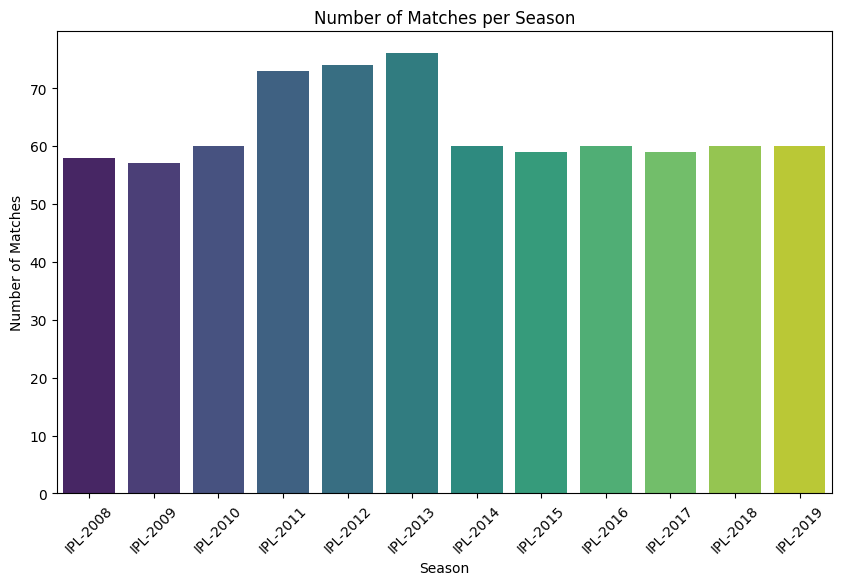

In [ ]:
season_counts = df['Season'].value_counts().sort_index()

# Plot the frequency table with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

<ipython-input-201-a2f5b13df463>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='Spectral')


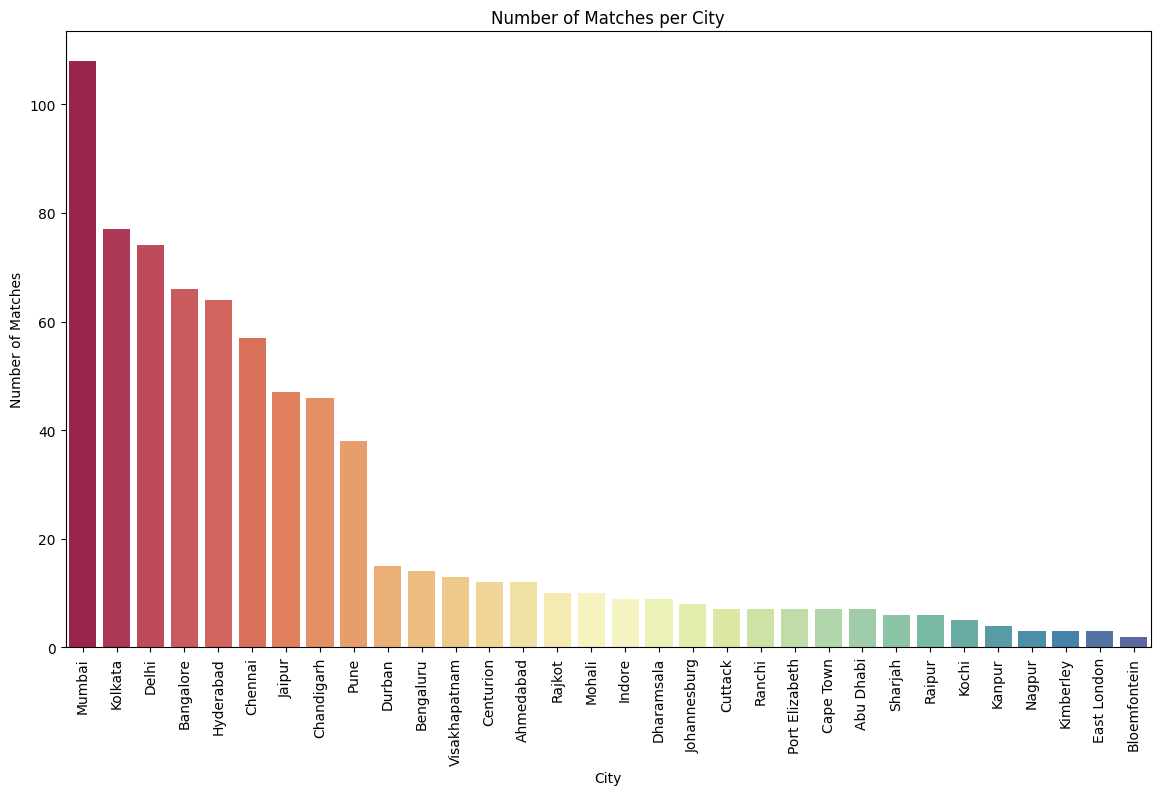

In [ ]:
city_counts = df['city'].value_counts()

# Plot the frequency table with a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Spectral')
plt.title('Number of Matches per City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

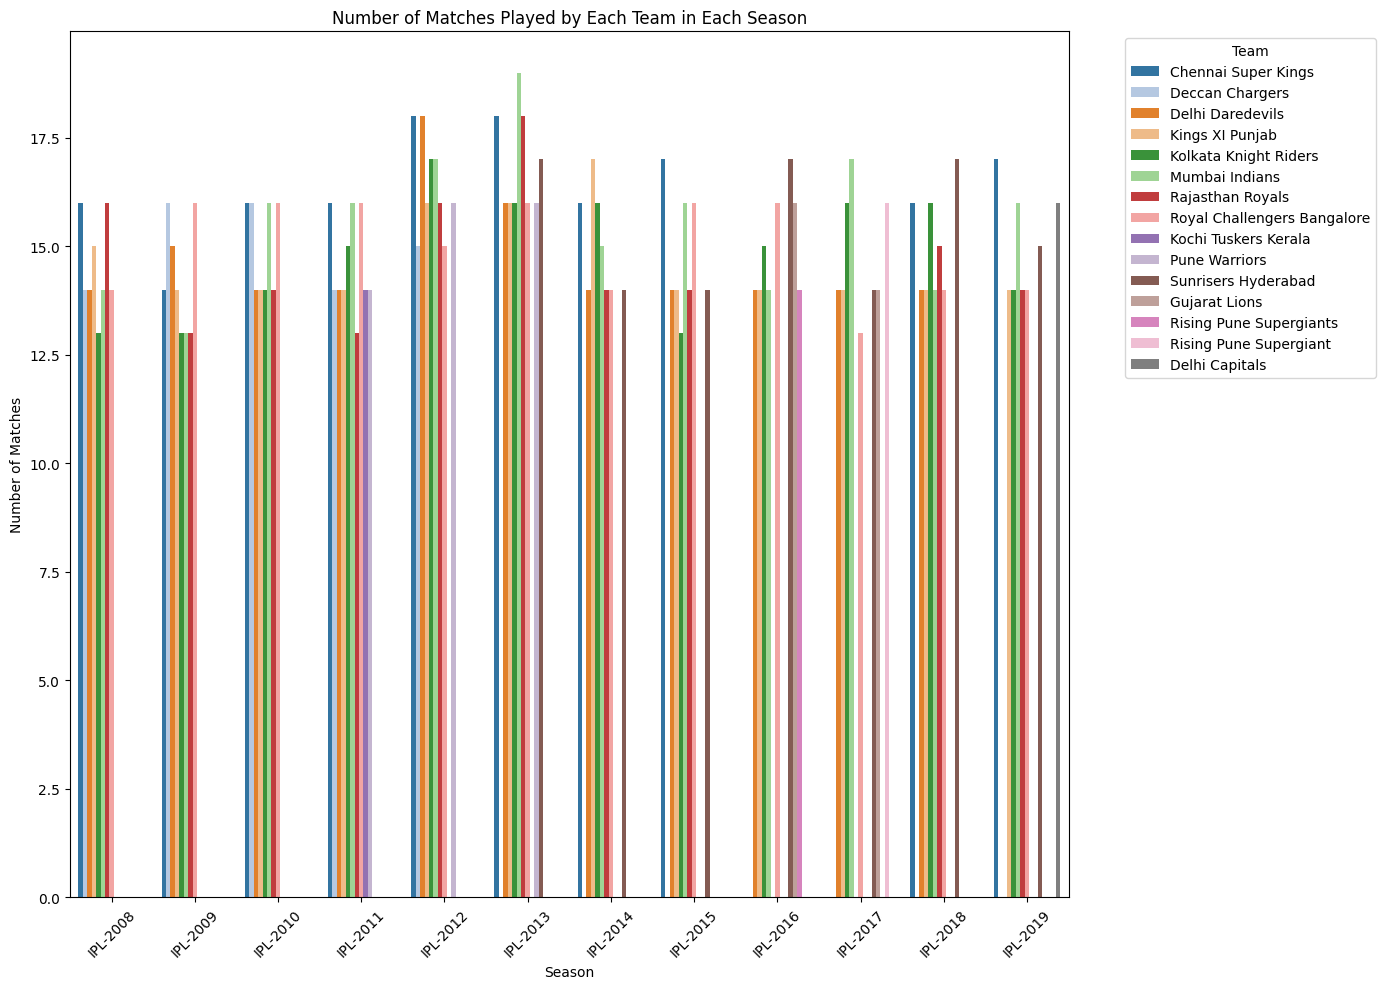

In [ ]:
# Step 1: Count matches for team1
team1_counts = df.groupby(['Season', 'team1']).size().reset_index(name='matches')

# Step 2: Count matches for team2
team2_counts = df.groupby(['Season', 'team2']).size().reset_index(name='matches')

# Step 3: Combine the counts for team1 and team2
team1_counts.rename(columns={'team1': 'team'}, inplace=True)
team2_counts.rename(columns={'team2': 'team'}, inplace=True)
combined_counts = pd.concat([team1_counts, team2_counts]).groupby(['Season', 'team'], as_index=False).sum()

# Step 4: Create the plot
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_counts, x='Season', y='matches', hue='team', palette='tab20', dodge=True)
plt.title('Number of Matches Played by Each Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

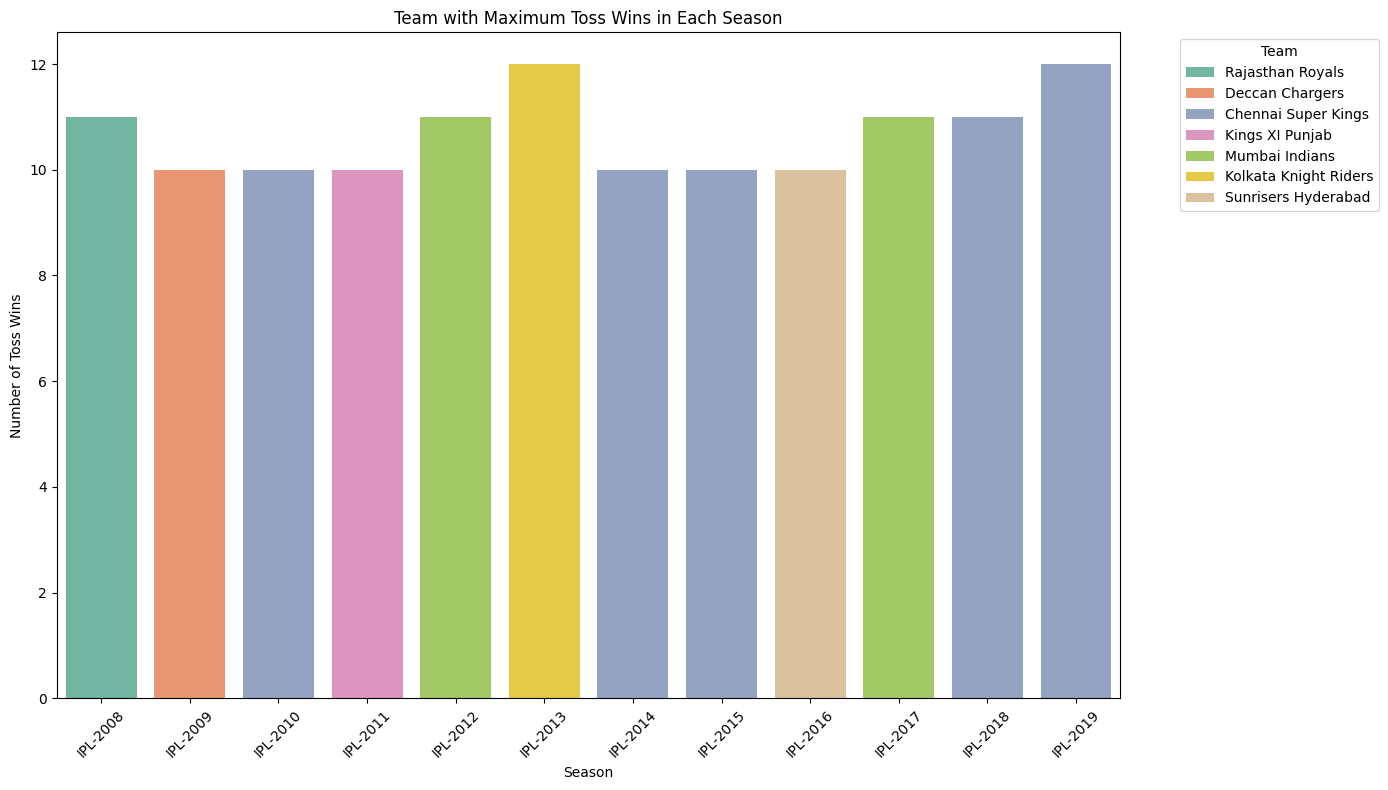

In [ ]:
# Step 1: Count toss wins for each team in each season
toss_wins = df.groupby(['Season', 'toss_winner']).size().reset_index(name='toss_wins')

# Step 2: Find the team with the maximum toss wins in each season
max_toss_wins = toss_wins.loc[toss_wins.groupby('Season')['toss_wins'].idxmax()]

# Step 3: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=max_toss_wins, x='Season', y='toss_wins', hue='toss_winner', palette='Set2', dodge=False)
plt.title('Team with Maximum Toss Wins in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Toss Wins')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

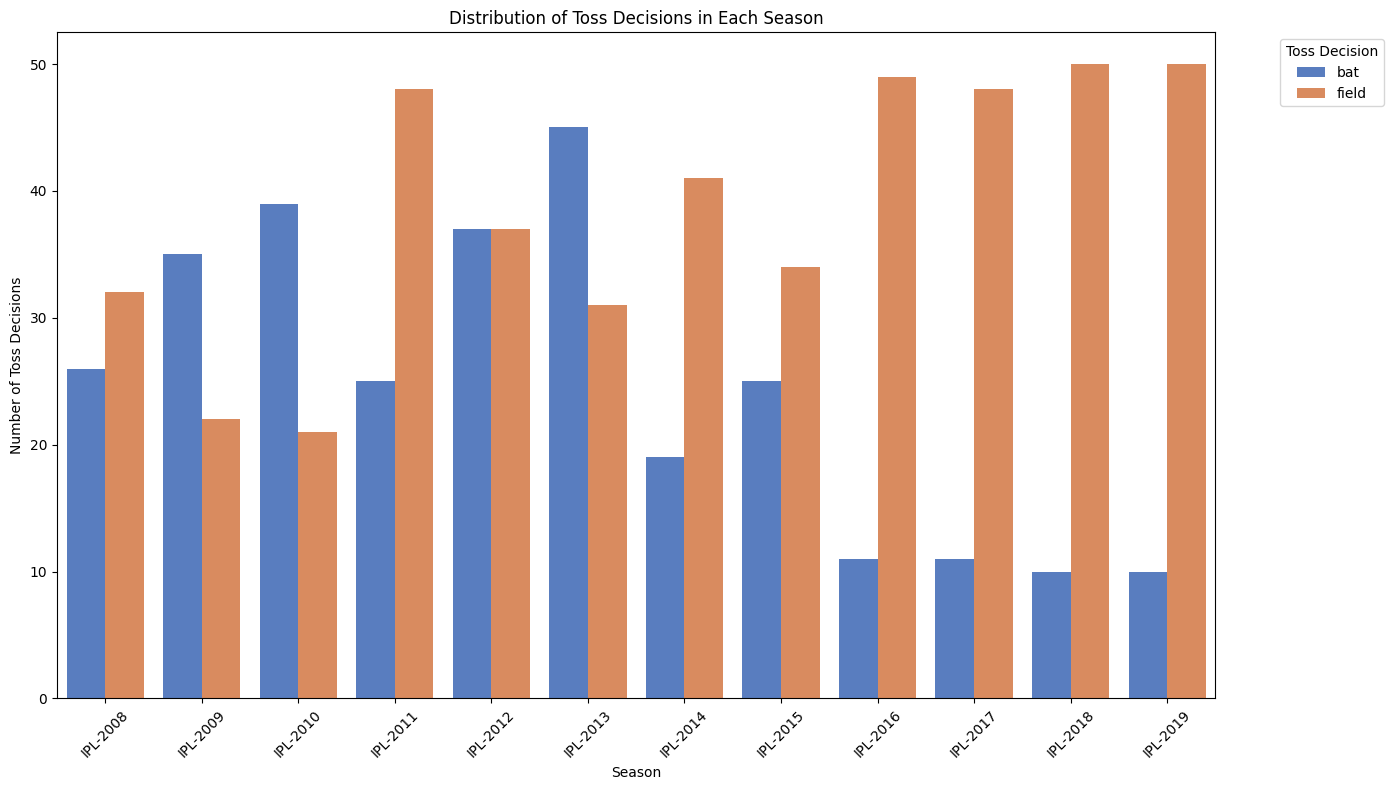

In [ ]:
# Step 1: Count toss decisions for each season
toss_decisions = df.groupby(['Season', 'toss_decision']).size().reset_index(name='counts')

# Step 2: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=toss_decisions, x='Season', y='counts', hue='toss_decision', palette='muted')
plt.title('Distribution of Toss Decisions in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.legend(title='Toss Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

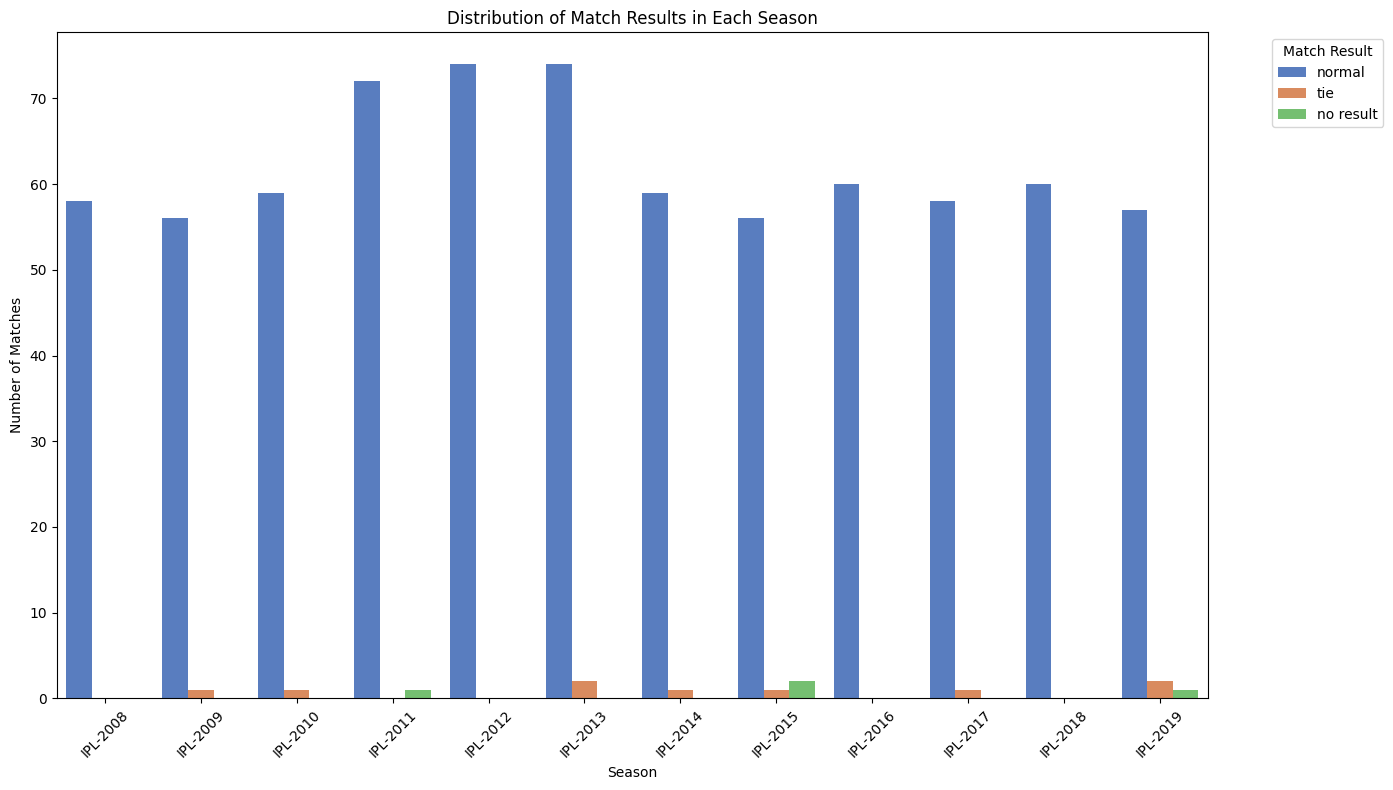

In [ ]:
match_results = df.groupby(['Season', 'result']).size().reset_index(name='counts')

# Step 2: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=match_results, x='Season', y='counts', hue='result', palette='muted')
plt.title('Distribution of Match Results in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Match Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

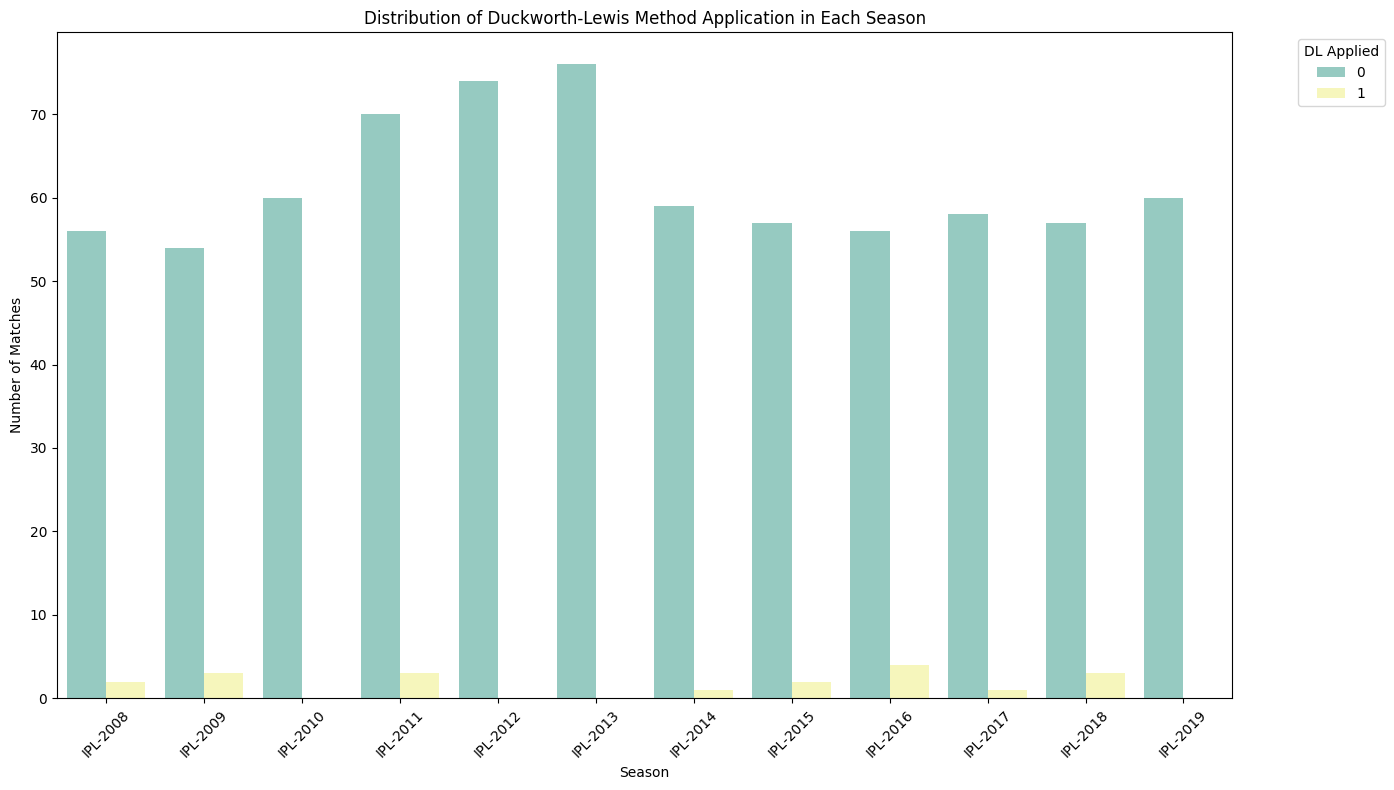

In [ ]:
# Step 1: Count occurrences of DL method application for each season
dl_applied_counts = df.groupby(['Season', 'dl_applied']).size().reset_index(name='counts')

# Step 2: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=dl_applied_counts, x='Season', y='counts', hue='dl_applied', palette='Set3')
plt.title('Distribution of Duckworth-Lewis Method Application in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='DL Applied', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

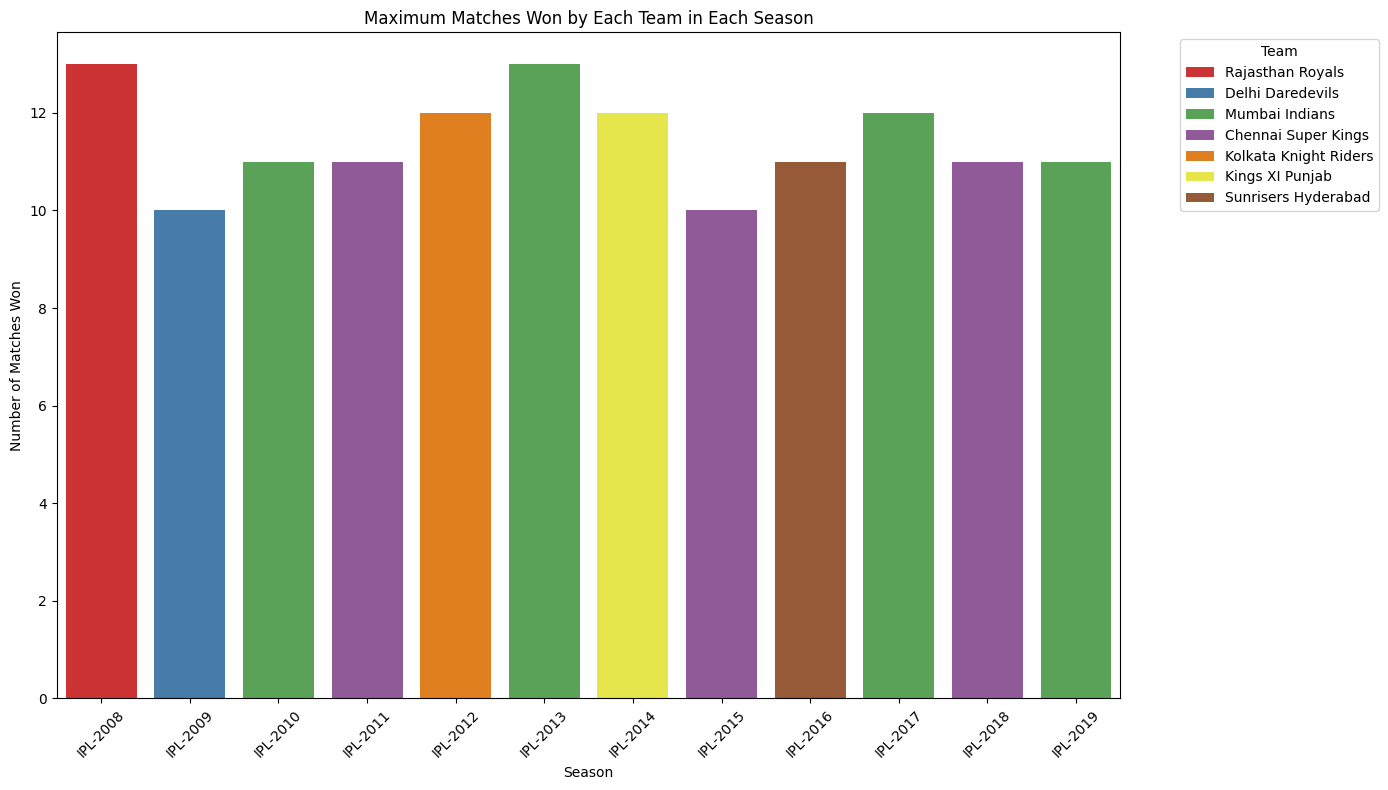

In [ ]:
# Step 1: Count matches won by each team in each season
matches_won = df.groupby(['Season', 'winner']).size().reset_index(name='wins')

# Step 2: Find the team with the maximum wins in each season
max_wins = matches_won.loc[matches_won.groupby('Season')['wins'].idxmax()]

# Step 3: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=max_wins, x='Season', y='wins', hue='winner', palette='Set1', dodge=False)
plt.title('Maximum Matches Won by Each Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Won')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IPL-2008'),
  Text(1, 0, 'IPL-2009'),
  Text(2, 0, 'IPL-2010'),
  Text(3, 0, 'IPL-2011'),
  Text(4, 0, 'IPL-2012'),
  Text(5, 0, 'IPL-2013'),
  Text(6, 0, 'IPL-2014'),
  Text(7, 0, 'IPL-2015'),
  Text(8, 0, 'IPL-2016'),
  Text(9, 0, 'IPL-2017'),
  Text(10, 0, 'IPL-2018'),
  Text(11, 0, 'IPL-2019')])

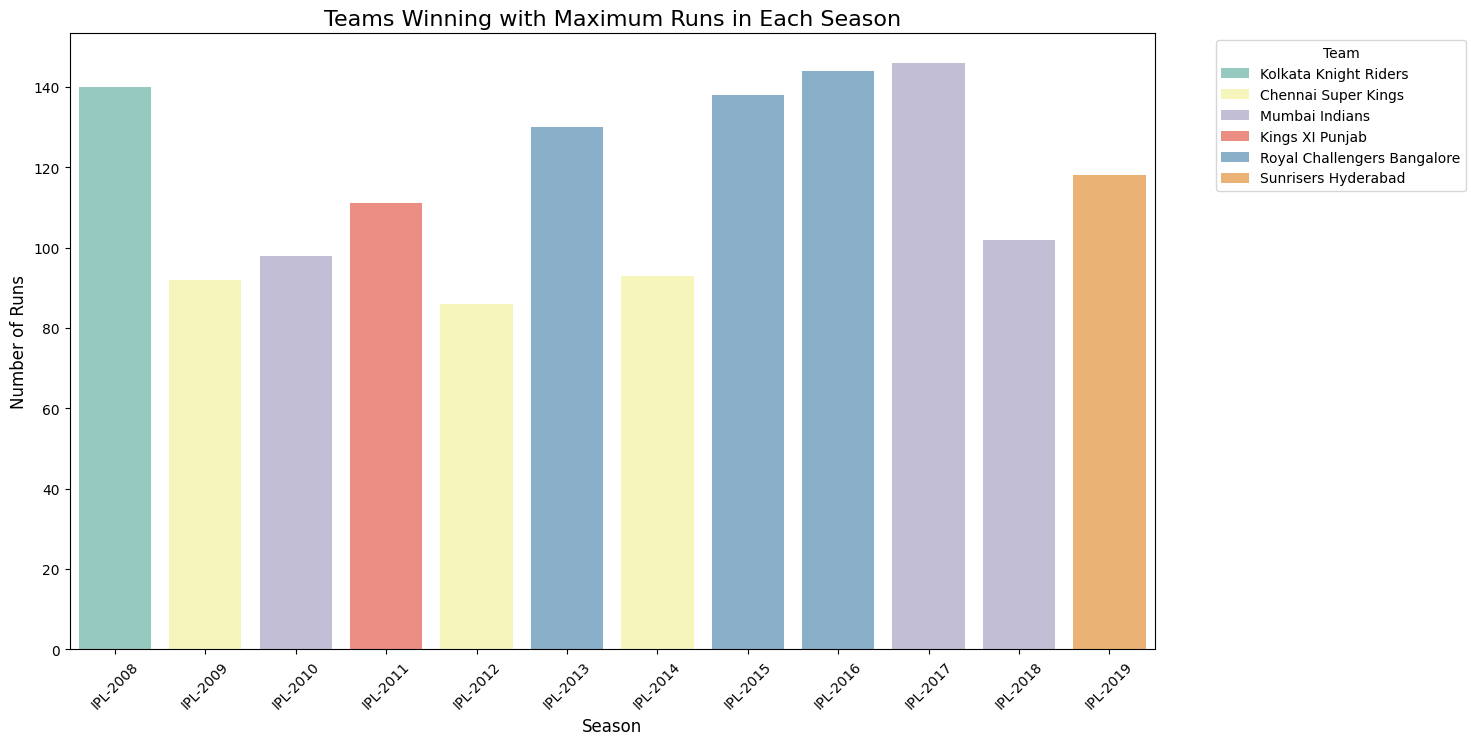

In [ ]:
# Step 1: Filter the dataset to get the rows where win_by_runs is maximum for each season
max_runs = df.loc[df.groupby('Season')['win_by_runs'].idxmax()]

# Step 2: Create the plot
plt.figure(figsize=(14, 8))  # Reduce the figure size further
sns.barplot(data=max_runs, x='Season', y='win_by_runs', hue='winner', palette='Set3')
plt.title('Teams Winning with Maximum Runs in Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Runs', fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IPL-2008'),
  Text(1, 0, 'IPL-2009'),
  Text(2, 0, 'IPL-2010'),
  Text(3, 0, 'IPL-2011'),
  Text(4, 0, 'IPL-2012'),
  Text(5, 0, 'IPL-2013'),
  Text(6, 0, 'IPL-2014'),
  Text(7, 0, 'IPL-2015'),
  Text(8, 0, 'IPL-2016'),
  Text(9, 0, 'IPL-2017'),
  Text(10, 0, 'IPL-2018'),
  Text(11, 0, 'IPL-2019')])

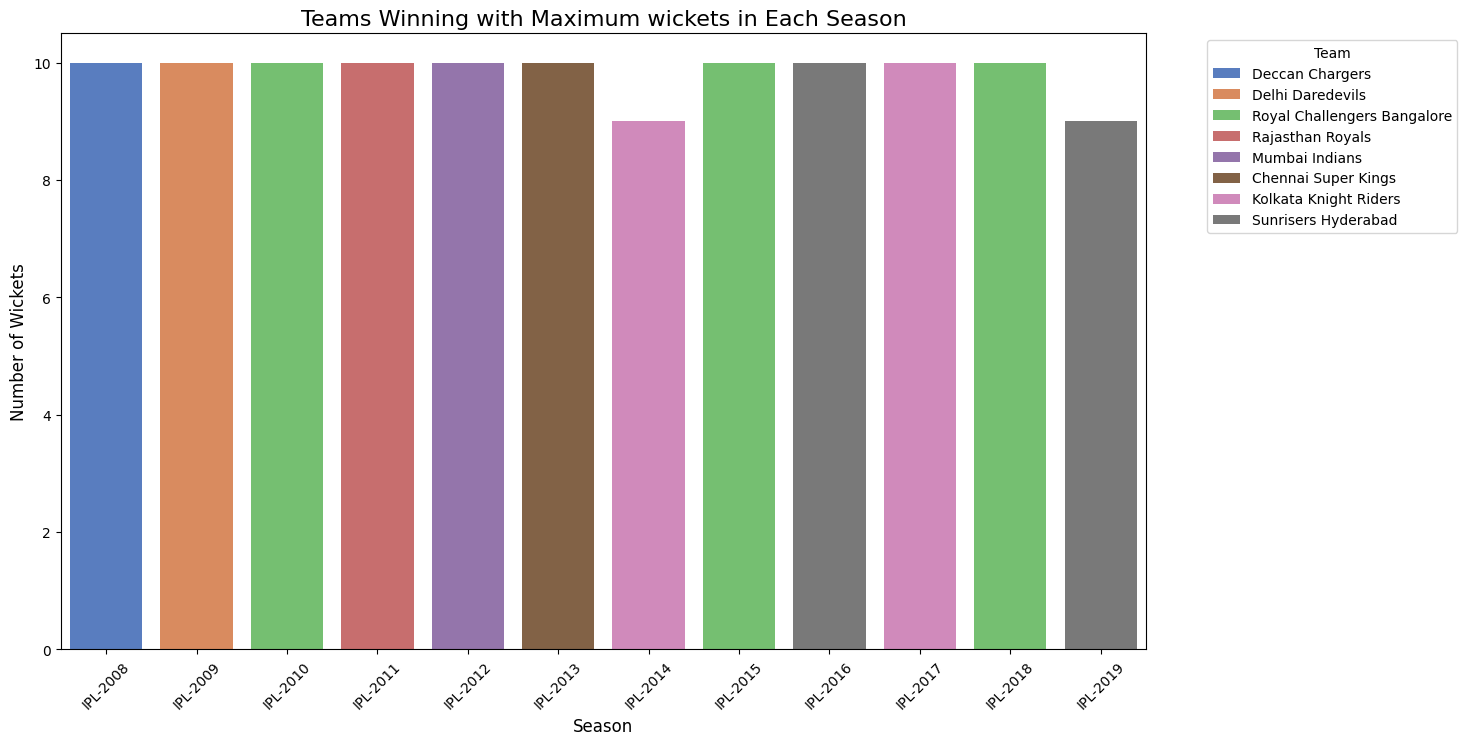

In [ ]:
# Step 1: Filter the dataset to get the rows where win_by_runs is maximum for each season
max_wickets = df.loc[df.groupby('Season')['win_by_wickets'].idxmax()]

# Step 2: Create the plot
plt.figure(figsize=(14, 8))  # Reduce the figure size further
sns.barplot(data=max_wickets, x='Season', y='win_by_wickets', hue='winner', palette='muted')
plt.title('Teams Winning with Maximum wickets in Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wickets', fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)

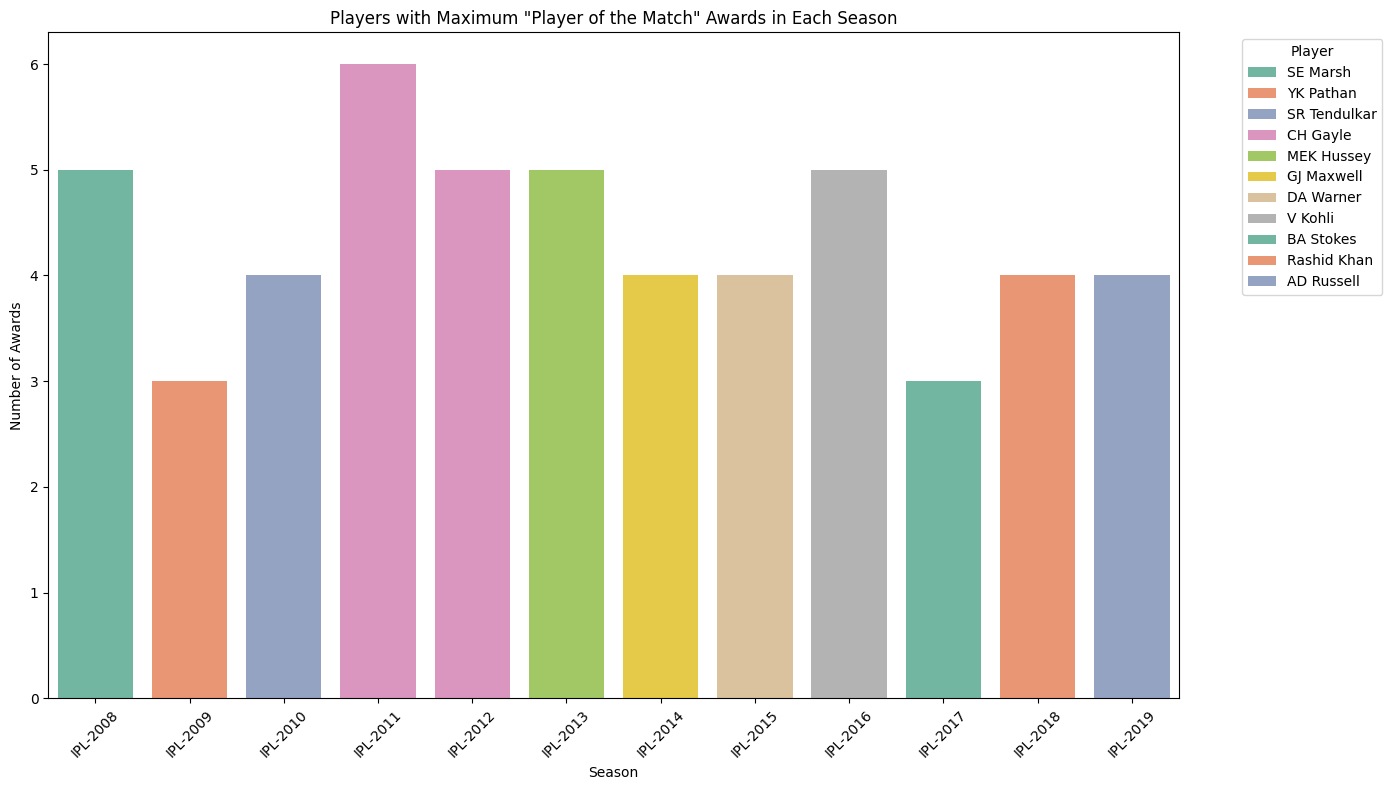

In [ ]:
# Step 1: Count "Player of the Match" awards for each player in each season
player_of_match_counts = df.groupby(['Season', 'player_of_match']).size().reset_index(name='awards')

# Step 2: Find the player with the maximum awards in each season
max_awards = player_of_match_counts.loc[player_of_match_counts.groupby('Season')['awards'].idxmax()]

# Step 3: Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=max_awards, x='Season', y='awards', hue='player_of_match', palette='Set2')
plt.title('Players with Maximum "Player of the Match" Awards in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Awards')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

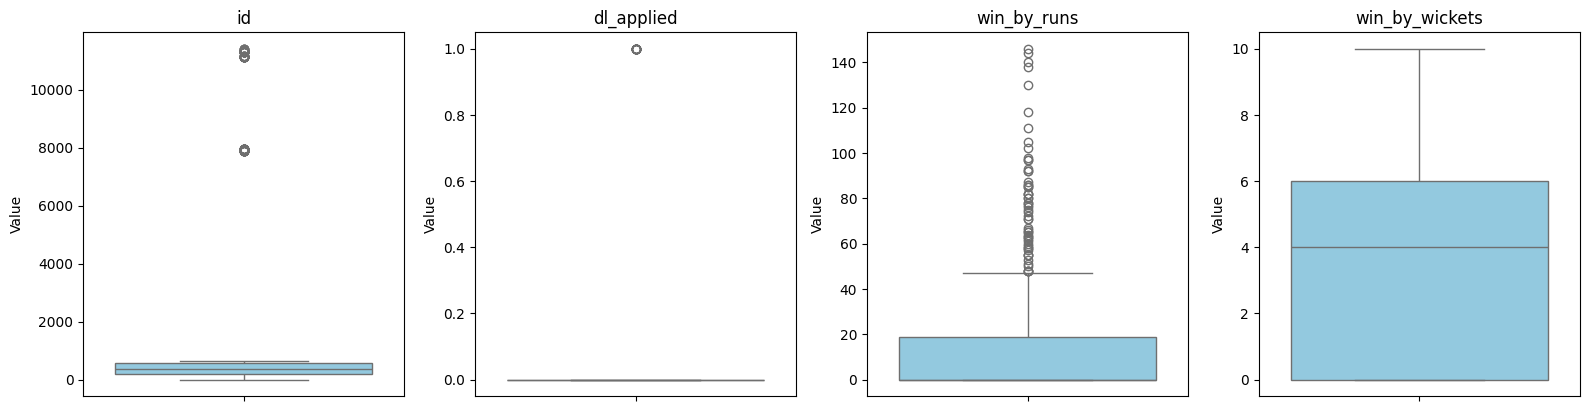

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df[column], orient='v', color='skyblue')
    plt.title(column)
    plt.ylabel('Value')
    plt.xlabel('')
plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Data Preprocessing
# Drop unnecessary columns
df.drop(['id', 'umpire1', 'umpire2', 'umpire3','date','Season'], axis=1, inplace=True)



# Encoding categorical variables
label_encoders = {}
for column in ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'venue', 'winner', 'player_of_match']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Splitting Data
X = df.drop('winner', axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}
for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
print("Model Performance:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance:
Logistic Regression: Accuracy = 0.30
Random Forest: Accuracy = 0.81
Gradient Boosting: Accuracy = 0.96
SVM: Accuracy = 0.30


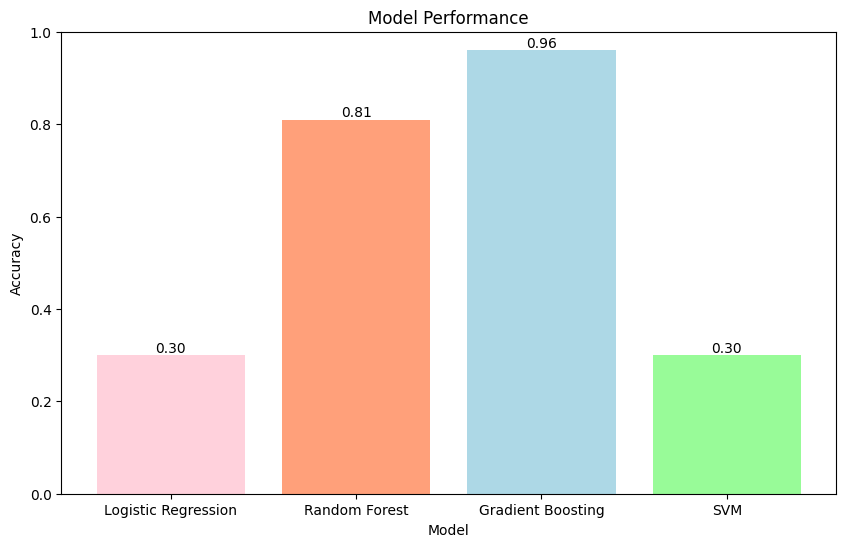

In [ ]:


# Model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [0.30, 0.81, 0.96, 0.30]  # Replace with the actual accuracies

# Define pastel colors
pastel_colors = ['#FFD1DC', '#FFA07A', '#ADD8E6', '#98FB98']

# Plotting the bar graph with pastel colors
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=pastel_colors)
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to better visualize accuracy range

# Add text labels above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.show()
